In [1]:
RAND_STATE = 42

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../saved/xgb_predictions.csv", index_col='PaperId')

In [3]:
df.shape

(8238, 41)

In [78]:
df["MisclassifiedAsHigh"] = df.apply(
    lambda x: 1 if x["PredictedBinnedCitations"] and x["Misclassified"] else 0, 
    axis=1
)
df["MisclassifiedAsLow"] = df.apply(
    lambda x: 1 if x["PredictedBinnedCitations"]== 0 and x["Misclassified"] else 0, 
    axis=1
)

misclassified = df[df["Misclassified"] == 1]
misclassified_as_high = df[df["MisclassifiedAsHigh"] == 1]
misclassified_as_low = df[df["MisclassifiedAsLow"] == 1]

In [80]:
misclassified_as_high.head()

,PredictedBinnedCitations,Abstract,Author_1,Author_10,Author_11,Author_2,Author_3,Author_4,Author_5,Author_6,...,JournalNameRank,PublisherRank,PageCount,Processed_Abstract,JournalNameRankNormalized,PublisherRankNormalized,BinnedCitations,Misclassified,MisclassifiedAsHigh,MisclassifiedAsLow
PaperId,,,,,,,,,,,,,,,,,,,,,
2156996291,1,This paper describes a procedure to manage con...,2661387586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,350.0,599.0,5.0,this paper describe procedure manage connotati...,445.0,399.0,0,1,1,0
2020458118,1,Continuous phase modulation (CPM) is a non-lin...,1970377810,NaN,NaN,1.979777e+09,2.271602e+09,2.102908e+09,NaN,NaN,...,736.0,509.0,12.0,continuous phase modulation cpm non linear mod...,361.0,161.0,0,1,1,0
2153480734,1,This study investigates the feasibility of usi...,1979555721,NaN,NaN,2.337637e+09,2.617339e+09,2.309903e+09,NaN,NaN,...,77.0,424.0,16.0,this study investigate feasibility use artific...,735.0,88.0,0,1,1,0
2021295924,1,Abstract Slow light based tunable delay line...,2147839681,NaN,NaN,2.097650e+09,2.436267e+09,2.322869e+09,2.145414e+09,NaN,...,726.0,602.0,4.0,abstract slow light base tunable delay line po...,460.0,412.0,0,1,1,0
2021867634,1,Cooperative spectrum sensing has been shown to...,2134018584,NaN,NaN,2.160386e+09,2.714225e+09,NaN,NaN,NaN,...,944.0,610.0,9.0,cooperative spectrum sense effective approach ...,1093.0,280.0,0,1,1,0


## Misclassifications

Total:  1599
Per class:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb997afac0>]],
      dtype=object)

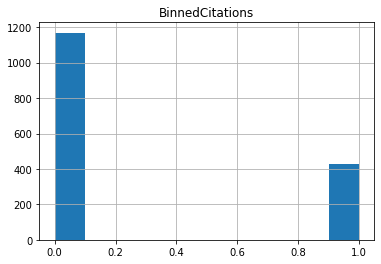

In [58]:
print("Total: ", misclassified.shape[0])
print("Per class:")
misclassified.hist("BinnedCitations")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb48395d30>]],
      dtype=object)

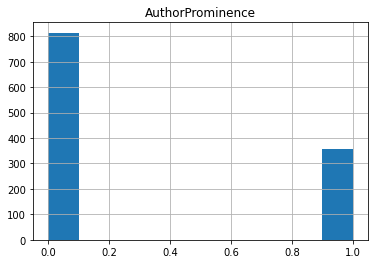

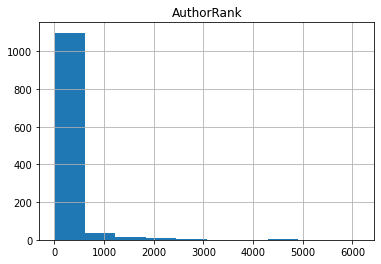

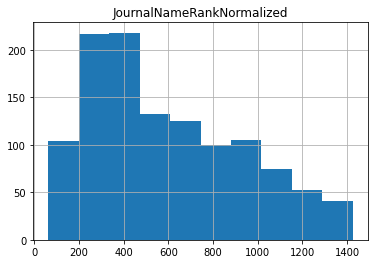

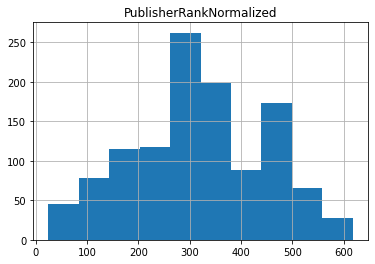

In [6]:
misclassified_as_high.hist("AuthorProminence")
misclassified_as_high.hist("AuthorRank")
misclassified_as_high.hist("JournalNameRankNormalized")
misclassified_as_high.hist("PublisherRankNormalized")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb5872da60>]],
      dtype=object)

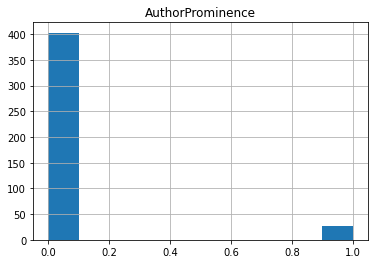

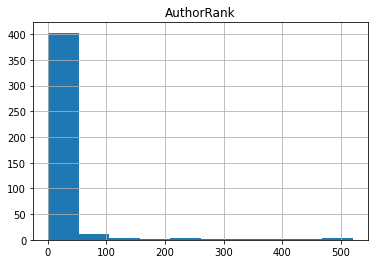

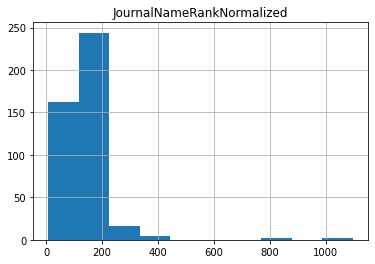

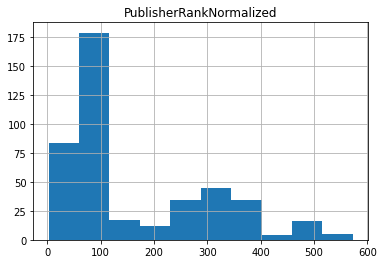

In [7]:
misclassified_as_low.hist("AuthorProminence")
misclassified_as_low.hist("AuthorRank")
misclassified_as_low.hist("JournalNameRankNormalized")
misclassified_as_low.hist("PublisherRankNormalized")

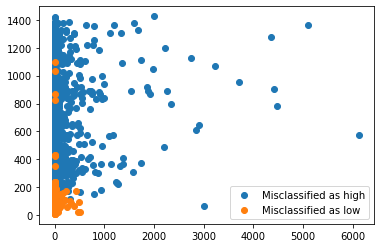

In [8]:
plt.scatter(misclassified_as_high["AuthorRank"], misclassified_as_high["JournalNameRankNormalized"])
plt.scatter(misclassified_as_low["AuthorRank"], misclassified_as_low["JournalNameRankNormalized"])
plt.legend(["Misclassified as high", "Misclassified as low"])

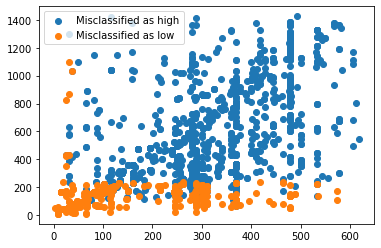

In [9]:
plt.scatter(misclassified_as_high["PublisherRankNormalized"], misclassified_as_high["JournalNameRankNormalized"])
plt.scatter(misclassified_as_low["PublisherRankNormalized"], misclassified_as_low["JournalNameRankNormalized"])
plt.legend(["Misclassified as high", "Misclassified as low"])

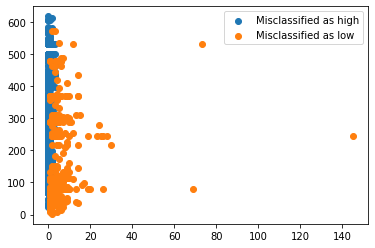

In [10]:
plt.scatter(misclassified_as_high["CitationCount"], misclassified_as_high["PublisherRankNormalized"])
plt.scatter(misclassified_as_low["CitationCount"], misclassified_as_low["PublisherRankNormalized"])
plt.legend(["Misclassified as high", "Misclassified as low"])

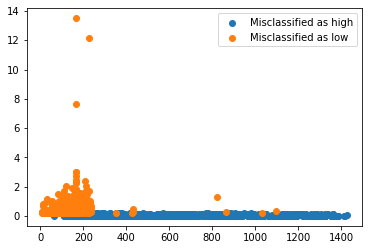

In [11]:

plt.scatter(misclassified_as_high["JournalNameRankNormalized"], misclassified_as_high["CitationCountPerYear"])
plt.scatter(misclassified_as_low["JournalNameRankNormalized"], misclassified_as_low["CitationCountPerYear"])
plt.legend(["Misclassified as high", "Misclassified as low"])

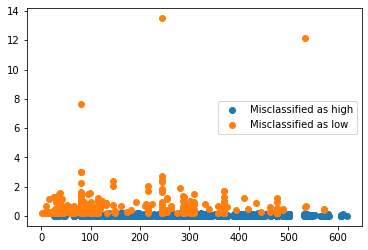

In [12]:
plt.scatter(misclassified_as_high["PublisherRankNormalized"], misclassified_as_high["CitationCountPerYear"])
plt.scatter(misclassified_as_low["PublisherRankNormalized"], misclassified_as_low["CitationCountPerYear"])
plt.legend(["Misclassified as high", "Misclassified as low"])

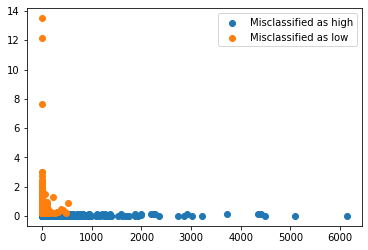

In [13]:
plt.scatter(misclassified_as_high["AuthorRank"], misclassified_as_high["CitationCountPerYear"])
plt.scatter(misclassified_as_low["AuthorRank"], misclassified_as_low["CitationCountPerYear"])
plt.legend(["Misclassified as high", "Misclassified as low"])
plt.show()

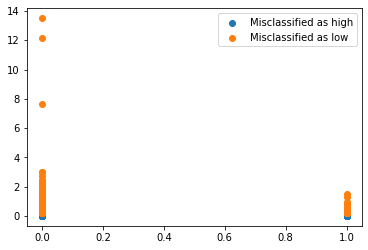

In [81]:
plt.scatter(misclassified_as_high["AuthorProminence"], misclassified_as_high["CitationCountPerYear"])
plt.scatter(misclassified_as_low["AuthorProminence"], misclassified_as_low["CitationCountPerYear"])
plt.legend(["Misclassified as high", "Misclassified as low"])
plt.show()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def correlation(df, columns=None, plot=True):
    t = df[columns] if columns else df
    if not plot:
        print(t.corr())
    else:
        fig = plt.figure(figsize=(12, 12), dpi=120)
        mask = np.triu(t.corr())
        sns.heatmap(
            t.corr(),
            mask=mask,
            cbar=False,
            square=True,
            annot=True,
            vmin=-1,
            vmax=1,
            center=0,
            cmap="coolwarm_r",
            linecolor="black",
        )
        
        plt.show()

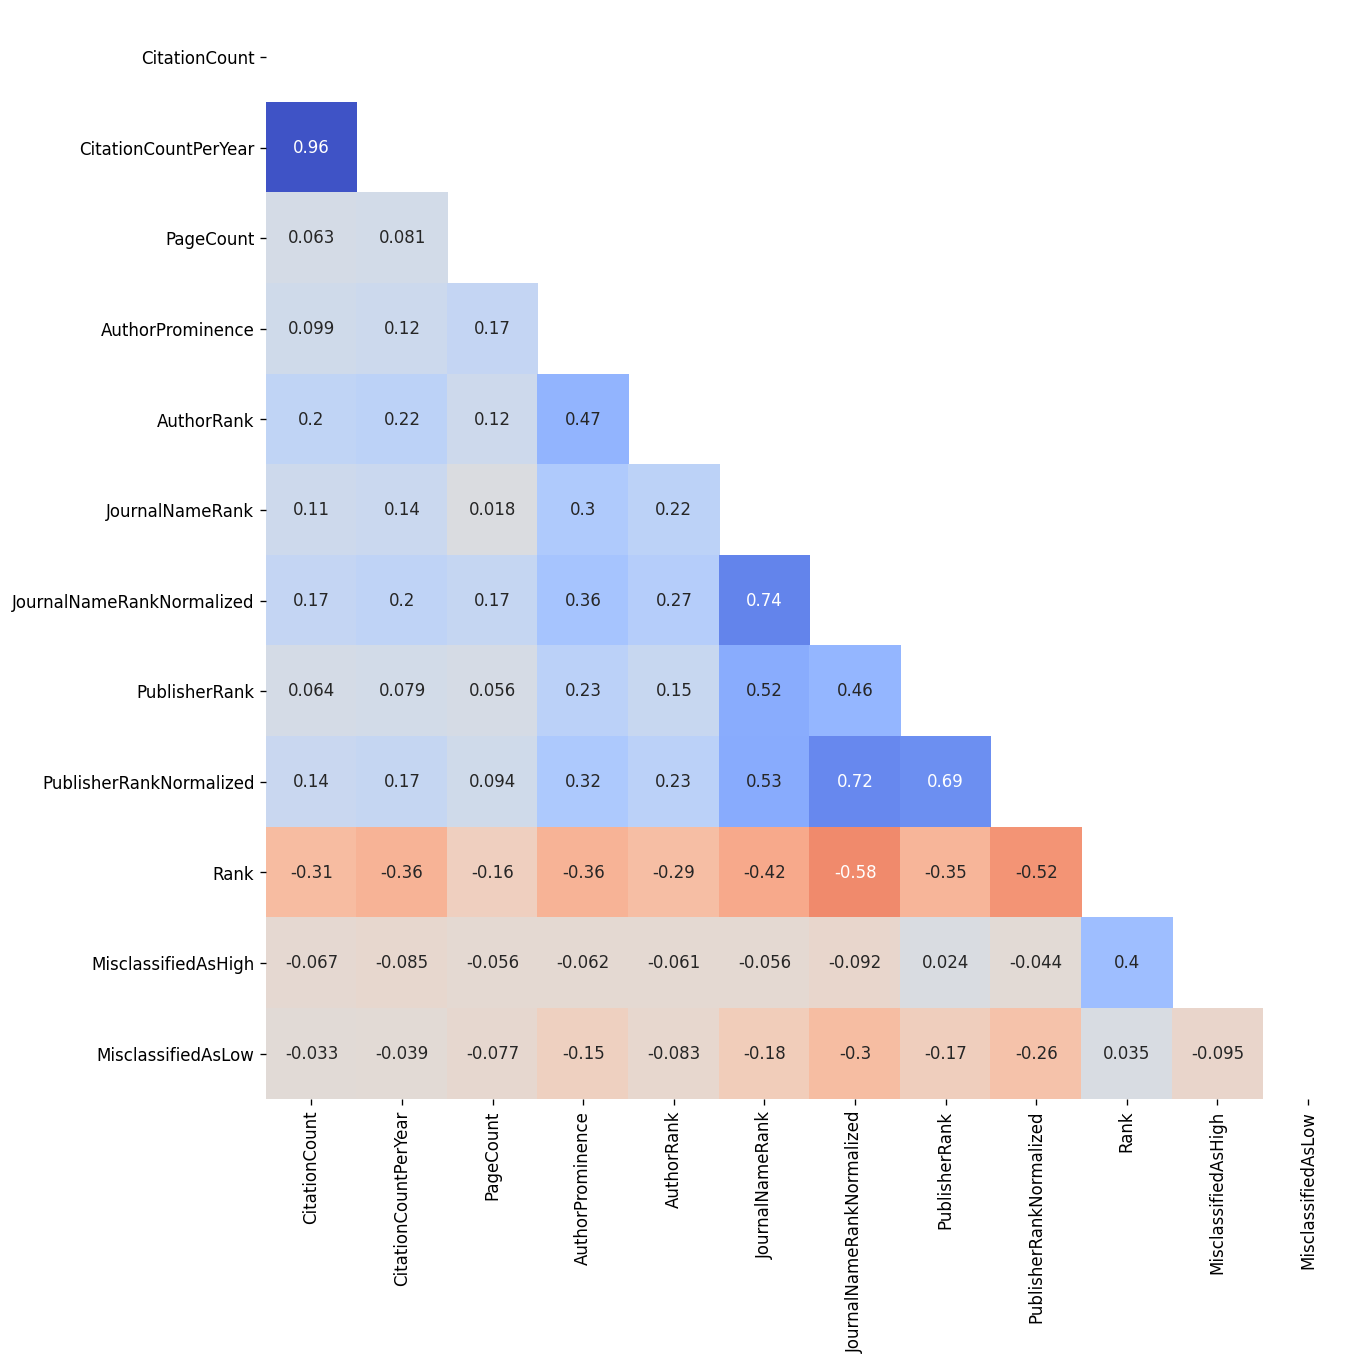

In [83]:
correlation(df, columns=[
    "CitationCount",
    "CitationCountPerYear",
    "PageCount",
    "AuthorProminence",
    "AuthorRank",
    "JournalNameRank",
    "JournalNameRankNormalized",
    "PublisherRank",
    "PublisherRankNormalized",
    "Rank",
    "MisclassifiedAsHigh",
    "MisclassifiedAsLow"
])

# Predicting Misclassifications


In [87]:
from sklearn.model_selection import train_test_split

features = [ 
    #"CitationCountPerYear",
    "AuthorProminence",
    "JournalNameRankNormalized",
    "PublisherRankNormalized",
    "AuthorRank",
    # "PageCount"
]

In [91]:
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier


X = df[features]
y = df["MisclassifiedAsHigh"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=RAND_STATE)

xgb = XGBClassifier(random_state=RAND_STATE)
xgb.fit(X_train, y_train)
y_true = y_test
y_pred = xgb.predict(X_test)

print("Train / test set")
print(X_train.shape)
print(X_test.shape)

print("Predicting MisClassified as High")
print(confusion_matrix(y_true, y_pred, labels=[0, 1]))
print(classification_report(y_true, y_pred))
print("Train performance")
print(xgb.score(X_train, y_train))
print("Dev performance")
print(xgb.score(X_test, y_test))

Train / test set
(7414, 4)
(824, 4)
Predicting MisClassified as High
[[691  21]
 [100  12]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       712
           1       0.36      0.11      0.17       112

    accuracy                           0.85       824
   macro avg       0.62      0.54      0.54       824
weighted avg       0.80      0.85      0.82       824

Train performance
0.9014027515511195
Dev performance
0.8531553398058253


In [90]:
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier


X = df[features]
y = df["MisclassifiedAsLow"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=RAND_STATE)

xgb = XGBClassifier(random_state=RAND_STATE)
xgb.fit(X_train, y_train)
y_true = y_test
y_pred = xgb.predict(X_test)

print("Train / test set")
print(X_train.shape)
print(X_test.shape)

print("Predicting MisClassified as Low")
print(confusion_matrix(y_true, y_pred, labels=[0, 1]))
print(classification_report(y_true, y_pred))
print("Train performance")
print(xgb.score(X_train, y_train))
print("Dev performance")
print(xgb.score(X_test, y_test))

Train / test set
(7414, 4)
(824, 4)
Predicting MisClassified as Low
[[761  15]
 [ 34  14]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       776
           1       0.48      0.29      0.36        48

    accuracy                           0.94       824
   macro avg       0.72      0.64      0.67       824
weighted avg       0.93      0.94      0.93       824

Train performance
0.97194496897761
Dev performance
0.9405339805825242
